In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score,KFold, learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve
plt.rcParams['figure.dpi'] = 100

## Assignment 1 : Web Stats

**Group 16**
George Cotea, 13842013
Laura Vochita, 13982540
Bartek Hryniecki, 15286002
Alexander Hepburn, 13175017

This project entails the use of OLS, Ridge regression and Lasso Regression.
The test and training sets have been provided and are loaded below from two csv files 'webStats_test.csv' and 'webStats_train.csv'.

In [4]:
train_set = pd.read_csv(r"C:\Users\alexa\Downloads\WebStats\WebStats\webStats_train.csv", header = None) # load the training set as a pandas dataframe
test_set = pd.read_csv(r"C:\Users\alexa\Downloads\WebStats\WebStats\webStats_test.csv" , header = None) # idem for the test set 

#### Analysing the data using Pandas

In [5]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [6]:
# Printing the info of the training set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, 0 to 280
dtypes: float64(281)
memory usage: 112.3 MB


In [7]:
# Printing the describtion of the training set
print(train_set.describe())

                0             1             2             3             4    \
count  52397.000000  52397.000000  52397.000000  52397.000000  52397.000000   
mean      39.444167     46.806717      0.358914    339.853102     24.681661   
std       79.121821     62.359996      6.840717    441.430109     69.598976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.285714      5.214318      0.000000     29.000000      0.000000   
50%       10.630660     19.353120      0.000000    162.000000      4.000000   
75%       40.304670     77.442830      0.000000    478.000000     15.000000   
max     1122.666600    559.432600    726.000000   2044.000000   1314.000000   

                5             6             7             8             9    \
count  52397.000000  52397.000000  52397.000000  52397.000000  52397.000000   
mean      15.214611     27.959159      0.002748    258.666030      5.829151   
std       32.251189     38.584013      0.131903    

In [8]:
X_train = train_set.iloc[:, :-1]  # Features: all columns except the last
y_train = train_set.iloc[:, -1]   # Labels: the last column

In [9]:
X_test = test_set.iloc[:, :-1]  # Features: all columns except the last
y_test = test_set.iloc[:, -1]   # Labels: the last column

In [10]:
# Check for missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64


Looking over the data we can see that the data is all numerical and there are no missing values in the training set; This is denoted by the fact that all of the columns have the same number of entries as the training set itself and that all of the statistical operations can be performed on the data (e.g. mean, standard deviation, etc.)

 The last column of the training set is different from the rest, and is the label so it shall be removed before training the model

In [11]:
print(X_train.shape)  
print(y_train.shape)

(52397, 280)
(52397,)


In [12]:
print(X_test.shape)
print(y_test.shape)

(7624, 280)
(7624,)


In [13]:
print(X_train.columns.tolist() == X_test.columns.tolist())

True


## Scaling the data

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Fitting and Evaluation

#### OLS
Ordinary Least-Squares Regression model

In [15]:
# Fitting the OLS model

#Creating a pipeline
steps = [('model',LinearRegression())]
pipeline = Pipeline(steps)

#Fitting the model
ols_pipe = pipeline.fit(X_train, y_train)
ols_pred = ols_pipe.predict(X_test)

#Cross-validation
kf = KFold(n_splits=10, shuffle=True,random_state=42)
ols_cv_results = cross_val_score(ols_pipe, X_train,y_train,cv=kf)
print(np.mean(ols_cv_results))


0.34655668940771944


In [16]:
# Reporting the MSE , MAE and R^2 of the OLS model
print('R^2:',ols_pipe.score(X_train,y_train))
print('Mean squared error:', mean_squared_error(y_test,ols_pred,squared=False))
print('Mean absolute error:',mean_absolute_error(y_test,ols_pred))

R^2: 0.36473186666146806
Mean squared error: 25.512037009398973
Mean absolute error: 8.42794518528492


#### Ridge Regression 
The Ridge Regression adds L2 regularization to the OLS model and is generally used to prevent overfitting

In [17]:
# Implementing scikit's grid search to find the best alpha value for the Ridge Regression model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
#To simplify the computing of the parameters, we arbitrarily set the number of iterations to 5000.

#Create a pipeline
steps = [('model',Ridge(alpha=0.1,max_iter=5000))]
ridge_pipe = Pipeline(steps)

#Fit the model 
ridge_pipe.fit(X_train,y_train)

kf = KFold(n_splits=10, shuffle=True,random_state=42)
ridge_cv_results = cross_val_score(ridge_pipe, X_train,y_train,cv=kf)
print(np.mean(ridge_cv_results))

0.34671295376850075


In [19]:
# Implementing the grid search
param_grid = {"model__alpha": np.logspace(-3, 4, 150)}

grid = GridSearchCV(ridge_pipe, param_grid, return_train_score=True, cv=kf)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        Ridge(alpha=0.1, max_iter=5000))]),
             param_grid={'model__alpha': array([1.00000000e-03, 1.11424288e-03, 1.24153719e-03, 1.38337396e-03,
       1.54141458e-03, 1.71751022e-03, 1.91372352e-03, 2.13235280e-03,
       2.37595891e-03, 2.64739529e-03, 2.94984134e-03, 3.28683970e-03,
       3.6...
       1.03138977e+03, 1.14921870e+03, 1.28050875e+03, 1.42679775e+03,
       1.58979923e+03, 1.77142246e+03, 1.97379486e+03, 2.19928686e+03,
       2.45053971e+03, 2.73049642e+03, 3.04243618e+03, 3.39001283e+03,
       3.77729765e+03, 4.20882699e+03, 4.68965549e+03, 5.22541521e+03,
       5.82238167e+03, 6.48754729e+03, 7.22870335e+03, 8.05453121e+03,
       8.97470401e+03, 1.00000000e+04])},
             return_train_score=True)

In [20]:
# Printing the best alpha value for the Ridge Regression model
print(grid.best_params_)
print(grid.best_score_)

{'model__alpha': 2730.4964154553254}
0.34969625030394413


In [21]:
# Fitting the Ridge Regression model with the best alpha value
steps = [('model',Ridge(alpha=2730.4964154553254,max_iter=5000))]
ridge_pipe = Pipeline(steps)

ridge_pipe.fit(X_train,y_train)
ridge_pred = ridge_pipe.predict(X_test)

In [22]:
# Reporting the MSE , MAE and R^2 of the Ridge Regression model

print('Cross-validation score:', np.mean(cross_val_score(ridge_pipe, X_train,y_train,cv=kf)))
print('R^2:',ridge_pipe.score(X_train,y_train))
print('Mean squared error:', mean_squared_error(y_test,ridge_pred,squared=False))
print('Mean absolute error:',mean_absolute_error(y_test,ridge_pred))

Cross-validation score: 0.34969625030394413
R^2: 0.36239976182059663
Mean squared error: 25.224868637355954
Mean absolute error: 8.226492845001683


#### Lasso Regression 
The Lasso Regression adds L1 regularization to the OLS model and is generally used to prevent overfitting

In [23]:
# Define a broader range for alpha
parameters = {'alpha': [0.1, 0.5, 1, 5, 10, 20, 50, 100, 200, 500, 1000]}

# Create Lasso regressor with a higher number of iterations
lasso = Lasso(max_iter=10000)  # You can adjust this number if needed

# Grid search with cross-validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Print the best parameters and score
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)



{'alpha': 0.1}
-1008.4902677566491


In [24]:
# Fitting the Lasso Regression model with the best alpha value
alpha_range = np.logspace(-1, 1, 10)  # Simplified range for alpha

# Create a Lasso pipeline with feature scaling
lasso_pipeline = Pipeline([ 
    ('lasso', Lasso(alpha=0.1,max_iter=5000))  # Reduced max_iter
])
lasso_pipeline.fit(X_train,y_train)
y_pred_lasso = lasso_regressor.predict(X_test)

In [25]:
# Reporting the MSE , MAE and R^2 of the Lasso Regression model
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = lasso_pipeline.score(X_test, y_test)


print('MSE: ', mse)
print('MAE: ', mae)
print('R^2: ', r2)

MSE:  637.3431655600486
MAE:  7.97644222952762
R^2:  0.31486398682408057


## Comparing the models (plotting the learning curves)

### OLS

Text(0, 0.5, 'R^2')

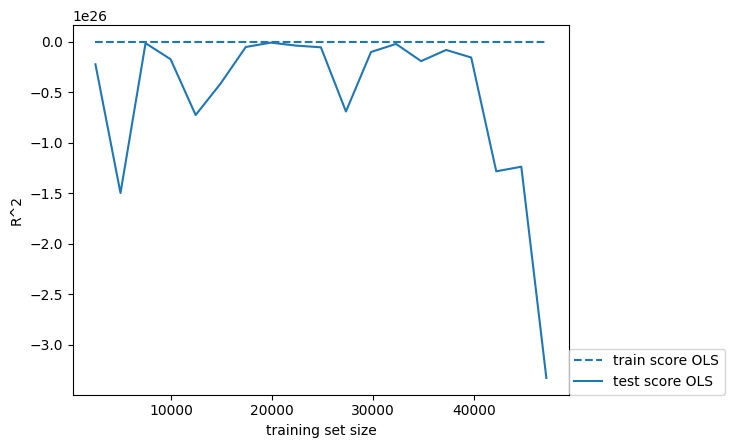

In [26]:
# Plotting the learning curves for the OLS model
train_set_size, train_scores, test_scores = learning_curve(ols_pipe, X_train, y_train, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
test_mean = test_scores.mean(axis=1)
train_mean = train_scores.mean(axis=1)
line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score OLS")
plt.plot(train_set_size, test_mean, label="test score OLS",c=line.get_color())
plt.legend(loc=(1, 0)) 
plt.xlabel("training set size")
plt.ylabel("R^2")

### Ridge

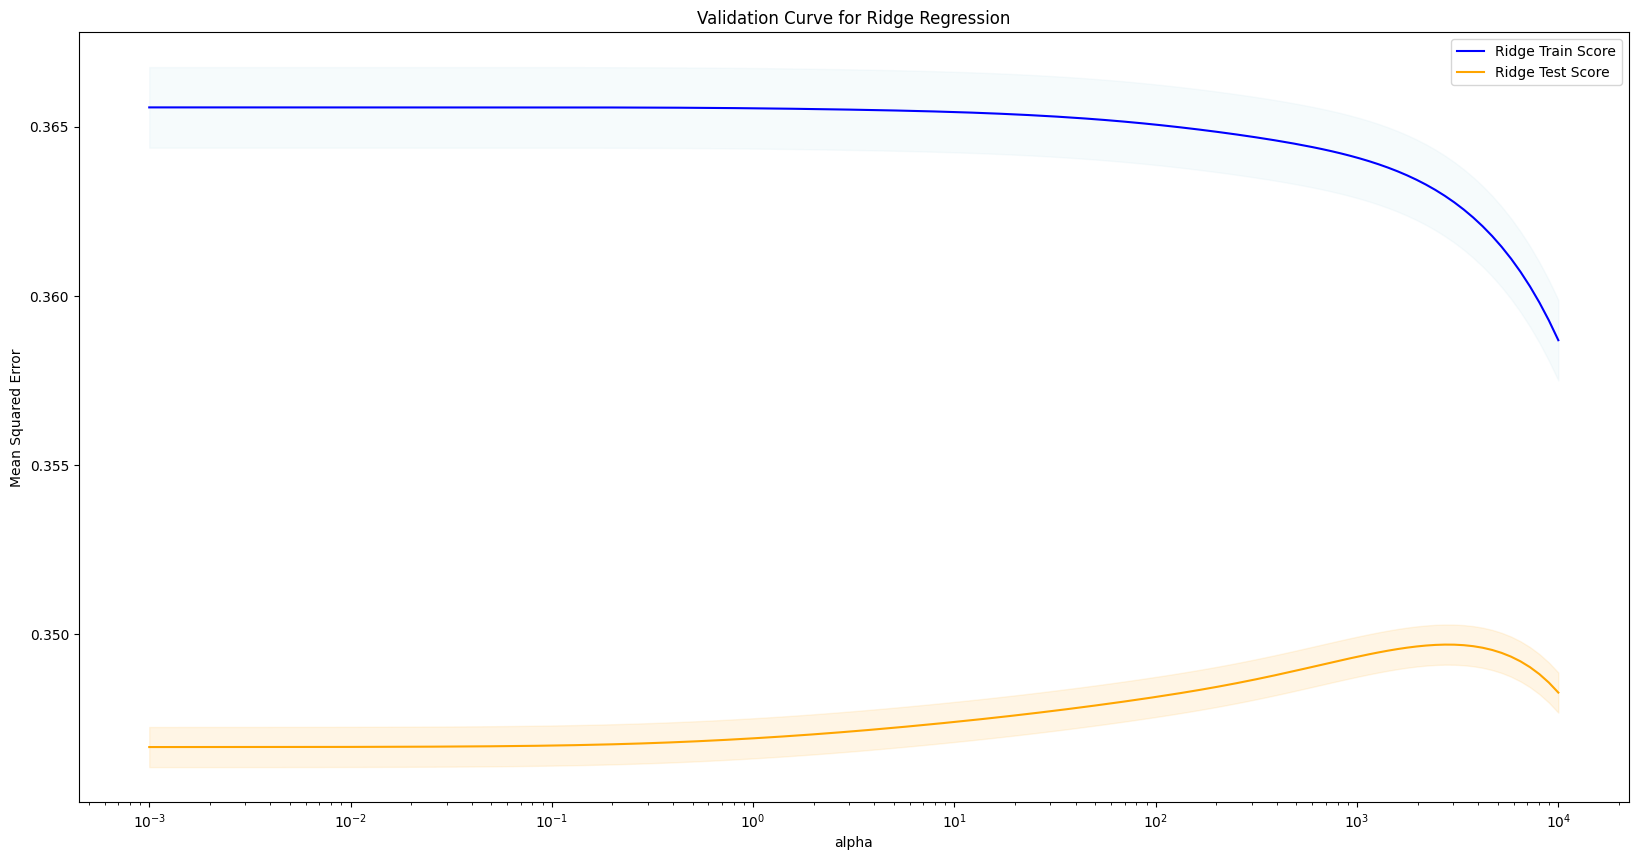

In [27]:
# Extract mean test scores for each alpha value
ridge_mean_test_scores = grid.cv_results_['mean_test_score']
ridge_mean_train_scores = grid.cv_results_['mean_train_score']

# Plotting the validation curves
plt.figure(figsize=(20, 10))

# Ridge validation curve for train scores
plt.plot(param_grid['model__alpha'], ridge_mean_train_scores, label='Ridge Train Score', color='blue')

# Ridge validation curve for test scores
plt.plot(param_grid['model__alpha'], ridge_mean_test_scores, label='Ridge Test Score', color='orange')

# Fill between the lines for variance visualization
std_train_score = np.std(grid.cv_results_['split0_train_score'])
std_test_score = np.std(grid.cv_results_['split0_test_score'])
plt.fill_between(param_grid['model__alpha'], ridge_mean_train_scores - std_train_score,
                 ridge_mean_train_scores + std_train_score, alpha=0.1, color='lightblue')
plt.fill_between(param_grid['model__alpha'], ridge_mean_test_scores - std_test_score,
                 ridge_mean_test_scores + std_test_score, alpha=0.1, color='orange')

# Beautifying the graph
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.show()

Text(0, 0.5, 'R^2')

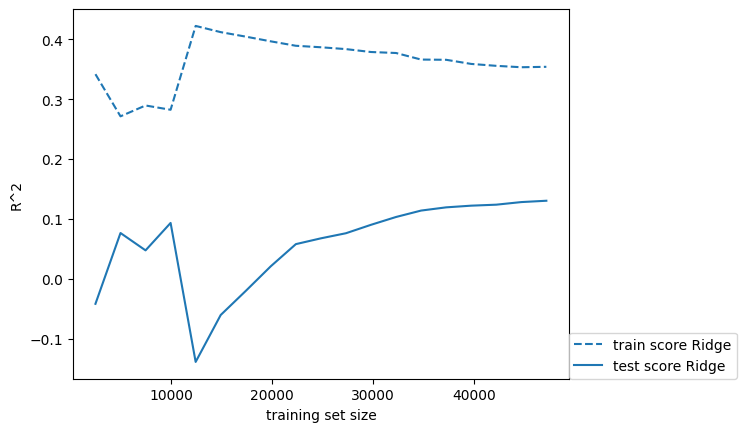

In [28]:
#Learning curve for Ridge Regression
train_set_size, train_scores, test_scores = learning_curve(ridge_pipe, X_train, y_train, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
test_mean = test_scores.mean(axis=1)
train_mean = train_scores.mean(axis=1)
line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score Ridge")
plt.plot(train_set_size, test_mean, label="test score Ridge",c=line.get_color())
plt.legend(loc=(1, 0)) 
plt.xlabel("training set size")
plt.ylabel("R^2")

### Lasso

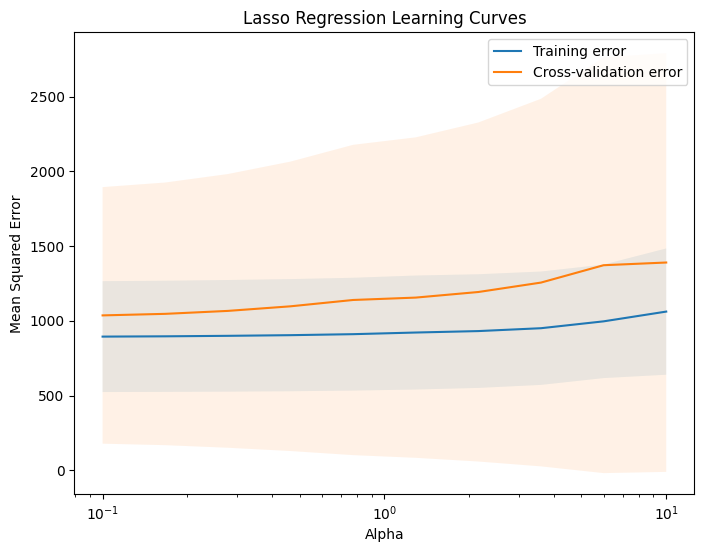

In [29]:
# Generate the training and test scores using validation_curve
train_scores, test_scores = validation_curve(
    lasso_pipeline, X_train, y_train, 
    param_name="lasso__alpha", 
    param_range=alpha_range, 
    scoring="neg_mean_squared_error", 
    cv=3  # Reduced number of folds
)

# Calculate mean and standard deviation of the scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(8, 6))
plt.title("Lasso Regression Learning Curves")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.semilogx(alpha_range, train_scores_mean, label="Training error")
plt.fill_between(alpha_range, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.semilogx(alpha_range, test_scores_mean, label="Cross-validation error")
plt.fill_between(alpha_range, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.legend()
plt.show()

## Report and Discussion

Based on the outputs of the three tested models we can report the following:

The OLS regression model has the highest R-squared (0.3647) value, therefore it explains the highest proportion of variability in the data, compared to the Ridge and Lasso regression models which have R-squared values of 0.3646 and 0.3645 respectively.

The OLS regression model also has the lowest MSE value (25.51) as opposed to the Ridge regression model (MSE = 25.22) and Lasso regression model (MSE = 637.34). From here we conclude that the mean squared error rate is quite similar between OLS and Ridge, but much lower when compared to Lasso. We could say that in terms of this error, the OLS and Ridge models make considerably more accurate predictions than Lasso, with OLS being slightly better.

The OLS regression model features a MAE value of 8.43 which is higher than the MAE value for both the Ridge (8.23) and Lasso (7.98) models. This means that, on average, the predictions of the Lasso model deviate the least from the actual values.

In terms of the learning curves we can report the following:

The OLS regression model showcases a straight line for the train score and a line that abruptly drops at the highest amounts of data for the test score. This might suggest overfitting in the model, where the model performs too well in the training data, and therefore is incapable of accommodating newly introduced data. The model thus seems to be memorising the training data instead of learning from it, which is why regularisation is needed.


The Ridge regression model showcases a line that slightly drops at higher amounts of data, while maintaining itself approximately the same at the highest amounts of training data. This suggests that the model tends to become slightly worse at fitting the training data when the amount of data increases over a certain amount. For the test data, we observe a slightly ascending line at higher amounts of data, which implies that the model tends to perform slightly better when provided with more data. Moreover, the learning curves suggests that the model learns well from the training set, until very large amounts of data are introduced, which can be observed in the descending line of the plot. At the same time, the test curve shows that there is a big gap between the training set and the set set, which is the case for overfitting. Another reason might be the usage of too many features.

The Lasso regression model showcases more stability in both the training error line and the cross-validation error line. The gap between these lines is also relatively low, which suggests we don't face the problem of overfitting in this case. The placement of these two lines on the graph also implies a good balance between bias and variance, since they lie in the middle portion, slightly tending to the lower portion of the plotting space.

## Conclusion

In conclusion, for the dataset that was provided the regression model which seems to perform the best is Lasso. Although based on the values of the R^2, MAE and MSE one might be tempted to choose the OLS or Ridge regression models, these models are shown to have considerable overfitting problems in the learning curves plots. Whereas, the Lasso model has worse values for the above mentioned metrics, however its learning curve shows much more stability and no considerable signs of underfitting or overfitting. Therefore, the L1 regularisation applied here seems to be the best for the provided dataset. The Lasso regression model performs reasonably well in the training data, which it manages to learn from and is able to accommodate newly introduced data, with a very slight ascendancy in error at the highest alpha value.